In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv("/Users/rachitgoli/InfantMortalityProject/UN_demo.csv",encoding='unicode_escape', header=1)
data


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,581,498,240,272,208,379,430,325,0,0
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,567,490,231,258,204,368,416,319,0,0
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,546,477,219,240,197,353,396,310,0,0
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,536,470,213,233,193,345,386,304,0,0
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,523,458,206,224,187,335,375,296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,20592,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,92,103,31,27,34,83,82,83,- 0,-16.7
20592,20593,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,99,89,29,29,29,80,89,72,- 0,-14.4
20593,20594,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,78,80,24,22,26,67,69,64,- 0,-14.5
20594,20595,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,86,86,27,25,28,73,76,70,- 0,-7.1


In [3]:
data = data.drop(['Index','Variant', 'Notes','Location code', 'ISO2 Alpha-code','SDMX code**','Parent code','Total Population, as of 1 January (thousands)'], axis=1) 
#eventuually drop country names and just use their alpha 3 code 
# # sort by type - only keep country/area!!!
# only years after 2000               

In [4]:
data

,"Region, subregion, country or area *",ISO3 Alpha-code,Type,Year,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,WORLD,NaN,World,1950.0,2 499 322,1 245 363,1 253 959,19.2,99.3,22.2,...,581,498,240,272,208,379,430,325,0,0
1,WORLD,NaN,World,1951.0,2 543 130,1 267 473,1 275 657,19.5,99.4,22.2,...,567,490,231,258,204,368,416,319,0,0
2,WORLD,NaN,World,1952.0,2 590 271,1 291 400,1 298 871,19.9,99.4,22.1,...,546,477,219,240,197,353,396,310,0,0
3,WORLD,NaN,World,1953.0,2 640 279,1 316 659,1 323 620,20.2,99.5,22.0,...,536,470,213,233,193,345,386,304,0,0
4,WORLD,NaN,World,1954.0,2 691 979,1 342 923,1 349 056,20.6,99.5,22.0,...,523,458,206,224,187,335,375,296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,Wallis and Futuna Islands,WLF,Country/Area,2017.0,12,6,6,85.3,93.6,33.8,...,92,103,31,27,34,83,82,83,- 0,-16.7
20592,Wallis and Futuna Islands,WLF,Country/Area,2018.0,12,6,6,84.4,93.3,34.4,...,99,89,29,29,29,80,89,72,- 0,-14.4
20593,Wallis and Futuna Islands,WLF,Country/Area,2019.0,12,6,6,83.7,93.1,35.0,...,78,80,24,22,26,67,69,64,- 0,-14.5
20594,Wallis and Futuna Islands,WLF,Country/Area,2020.0,12,6,6,83.2,93.0,35.5,...,86,86,27,25,28,73,76,70,- 0,-7.1


In [95]:
just_countries = data[data['Type'] == 'Country/Area']
just_countries = just_countries.drop(['Region, subregion, country or area *'], axis=1)


In [96]:
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
just_countries_years = just_countries[just_countries['Year'].isin(years)]
just_countries_years

,ISO3 Alpha-code,Type,Year,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
1782,BDI,Country/Area,2000.0,6 308,3 105,3 202,243.1,97.0,14.7,168,...,597,509,301,342,261,431,482,381,- 40,-6.3
1783,BDI,Country/Area,2001.0,6 466,3 184,3 282,249.2,97.0,14.9,178,...,584,494,293,334,251,420,471,368,10,1.5
1784,BDI,Country/Area,2002.0,6 649,3 275,3 374,256.2,97.1,15.1,195,...,552,477,270,301,240,394,436,354,- 17,-2.5
1785,BDI,Country/Area,2003.0,6 861,3 381,3 480,264.4,97.1,15.3,209,...,532,466,258,283,233,381,417,346,37,5.4
1786,BDI,Country/Area,2004.0,7 120,3 510,3 610,274.4,97.2,15.5,227,...,510,451,245,265,225,365,397,336,47,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,WLF,Country/Area,2017.0,12,6,6,85.3,93.6,33.8,0,...,92,103,31,27,34,83,82,83,- 0,-16.7
20592,WLF,Country/Area,2018.0,12,6,6,84.4,93.3,34.4,0,...,99,89,29,29,29,80,89,72,- 0,-14.4
20593,WLF,Country/Area,2019.0,12,6,6,83.7,93.1,35.0,0,...,78,80,24,22,26,67,69,64,- 0,-14.5
20594,WLF,Country/Area,2020.0,12,6,6,83.2,93.0,35.5,0,...,86,86,27,25,28,73,76,70,- 0,-7.1


In [97]:
#just renaming a few for now
just_countries_years = just_countries_years.rename(columns={'Total Population, as of 1 July (thousands)': 'Total Pop', 'Male Population, as of 1 July (thousands)': 'Male Pop', 
                                                            'Female Population, as of 1 July (thousands)': 'Female Pop', 'Population Density, as of 1 July (persons per square km)': 'Population Density'})
just_countries_years


,ISO3 Alpha-code,Type,Year,Total Pop,Male Pop,Female Pop,Population Density,"Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
1782,BDI,Country/Area,2000.0,6 308,3 105,3 202,243.1,97.0,14.7,168,...,597,509,301,342,261,431,482,381,- 40,-6.3
1783,BDI,Country/Area,2001.0,6 466,3 184,3 282,249.2,97.0,14.9,178,...,584,494,293,334,251,420,471,368,10,1.5
1784,BDI,Country/Area,2002.0,6 649,3 275,3 374,256.2,97.1,15.1,195,...,552,477,270,301,240,394,436,354,- 17,-2.5
1785,BDI,Country/Area,2003.0,6 861,3 381,3 480,264.4,97.1,15.3,209,...,532,466,258,283,233,381,417,346,37,5.4
1786,BDI,Country/Area,2004.0,7 120,3 510,3 610,274.4,97.2,15.5,227,...,510,451,245,265,225,365,397,336,47,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,WLF,Country/Area,2017.0,12,6,6,85.3,93.6,33.8,0,...,92,103,31,27,34,83,82,83,- 0,-16.7
20592,WLF,Country/Area,2018.0,12,6,6,84.4,93.3,34.4,0,...,99,89,29,29,29,80,89,72,- 0,-14.4
20593,WLF,Country/Area,2019.0,12,6,6,83.7,93.1,35.0,0,...,78,80,24,22,26,67,69,64,- 0,-14.5
20594,WLF,Country/Area,2020.0,12,6,6,83.2,93.0,35.5,0,...,86,86,27,25,28,73,76,70,- 0,-7.1


/Users/kendallscherer/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/kendallscherer/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


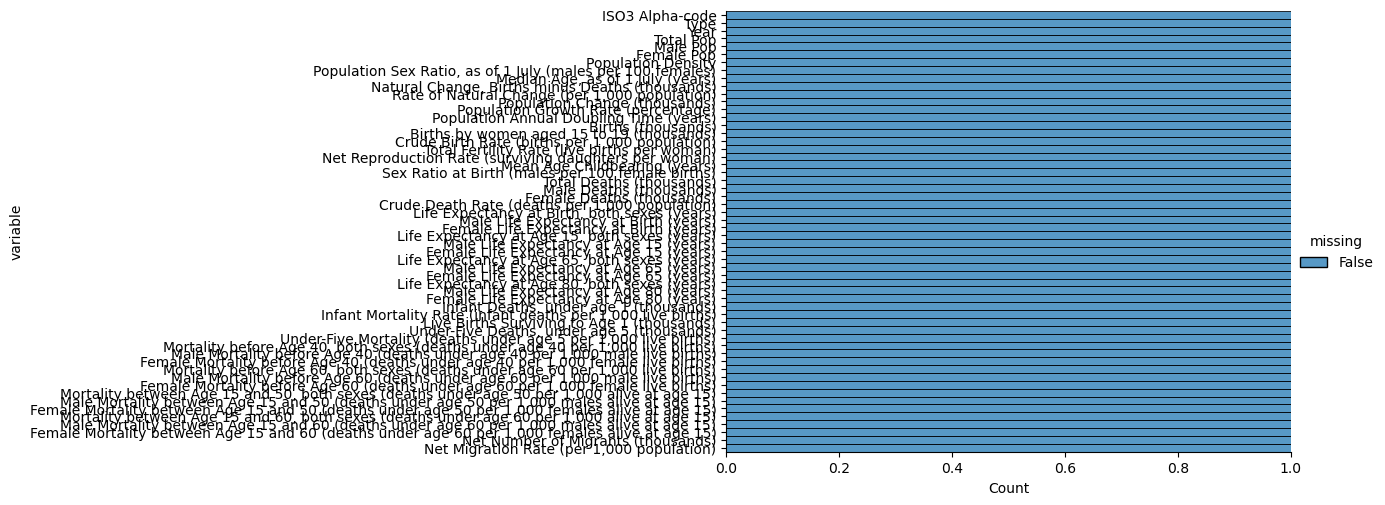

In [98]:
import seaborn as sns
sns.displot(
    data=just_countries_years.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

#no missing values!!!

In [99]:
just_countries_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5214 entries, 1782 to 20595
Data columns (total 56 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   ISO3 Alpha-code                                                                                 5214 non-null   object 
 1   Type                                                                                            5214 non-null   object 
 2   Year                                                                                            5214 non-null   float64
 3   Total Pop                                                                                       5214 non-null   object 
 4   Male Pop                                                                                        5214 non-null   object 
 5   Female Pop    

In [100]:
just_countries_years['Life Expectancy at Birth, both sexes (years)'] = pd.to_numeric(just_countries_years['Life Expectancy at Birth, both sexes (years)'], errors='coerce')


In [101]:
#target variable: Life Expectancy at Birth, both sexes (years)
just_countries_years['Life Expectancy at Birth, both sexes (years)'].value_counts()
just_countries_years['Life Expectancy at Birth, both sexes (years)'] = just_countries_years['Life Expectancy at Birth, both sexes (years)'].astype(float)
just_countries_years['Life Expectancy at Birth, both sexes (years)'].describe()



count    5192.000000
mean       71.114696
std         8.664660
min        42.000000
25%        65.800000
50%        73.100000
75%        77.400000
max        86.500000
Name: Life Expectancy at Birth, both sexes (years), dtype: float64

In [102]:
x = just_countries_years['Life Expectancy at Birth, both sexes (years)']
bins = [0,70,76,100]
labels=['low','middle','high']
just_countries_years['Life Expectancy at Birth, both sexes (years)'] = pd.cut(x, bins, labels) 

In [103]:
just_countries_years['Life Expectancy at Birth, both sexes (years)'].value_counts()
#low = 42-70
#middle = 70-

Life Expectancy at Birth, both sexes (years)
(0, 70]      1864
(76, 100]    1716
(70, 76]     1612
Name: count, dtype: int64